# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [445]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib as plt

%matplotlib inline


In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.tweet_id.head(4)

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
Name: tweet_id, dtype: int64

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
result = requests.get(url)
imagePredictions = result.content

In [9]:
with open("image-predictions.tsv", "w", encoding="utf-8") as file:
    file.write(imagePredictions.decode("utf-8"))

In [6]:
tweet_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
tweet_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
auth = tweepy.OAuth2BearerHandler(".env")
api = tweepy.API(auth)
def get_tweets(tweet_id):
    result = api.get_status(tweet_id)
    return result
    

In [34]:
for tweet_id in twitter_archive.tweet_id:
    try:
        result = get_tweets(tweet_id)
        json_tweet = json.dumps(result._json)
        print(result.id)
        with open('tweet_json.txt', 'a', encoding='utf-8') as filer:
            filer.write(json_tweet + '\n')
    except Exception as e:
        print(e)
    

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
404 Not Found
144 - No status found with that ID.
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560


824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981

770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
404 Not Found
144 - No status found with that ID.
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632


429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many 

429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many 

KeyboardInterrupt: 

In [6]:
#check where rate limiter stopped execution of api
twitter_archive[twitter_archive.tweet_id == 758828659922702336]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None


Rate limiter stopped at ID - 758828659922702336 with index of 899

In [48]:
# append next 900 tweets into file
for tweet_id in twitter_archive.iloc[899:].tweet_id:
    try:
        result = get_tweets(tweet_id)
        json_tweet = json.dumps(result._json)
        print(result.id)
        with open('tweet_json.txt', 'a', encoding='utf-8') as filer:
            filer.write(json_tweet + '\n')
    except Exception as e:
        print(e)

758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
404 Not Found
144 - No status found with that ID.
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976


705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244

678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 T

429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many Requests
88 - Rate limit exceeded
429 Too Many 

KeyboardInterrupt: 

In [7]:
#check where rate limiter stopped execution of api
twitter_archive[twitter_archive.tweet_id == 677228873407442944]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None


Rate limiter stopped at ID - 677228873407442944 with index of 1798

In [8]:
twitter_archive.iloc[1799:].tweet_id

1799    677187300187611136
1800    676975532580409345
1801    676957860086095872
1802    676949632774234114
1803    676948236477857792
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 557, dtype: int64

In [11]:
#starting from the next tweet_id
for tweet_id in twitter_archive.iloc[1799:].tweet_id:
    try:
        result = get_tweets(tweet_id)
        json_tweet = json.dumps(result._json)
        print(result.id)
        with open('tweet_json.txt', 'a', encoding='utf-8') as filer:
            filer.write(json_tweet + '\n')
    except Exception as e:
        print(e)

677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029

In [7]:
#code to count number of tweets in text file
count = 0
with open('tweet_json.txt') as file:
    for i in file:
        count = count + 1
        
print(count)

2328


In [9]:
tweet_data = {'tweet_id': [], 'retweet_count': [], 'favourites_count': []}
count = 0
with open('tweet_json.txt') as handle:
    for content in handle:
        content_json = json.loads(content)
        tweet_data['tweet_id'].append(content_json['id'])
        tweet_data['retweet_count'].append(content_json['retweet_count'])
        tweet_data['favourites_count'].append(content_json['favorite_count'])
        count = count + 1
        print(count)
        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256


In [10]:
tweet_counts = pd.DataFrame(tweet_data)
tweet_counts.head()

,tweet_id,retweet_count,favourites_count
0,892420643555336193,6973,33708
1,892177421306343426,5276,29231
2,891815181378084864,3465,21979
3,891689557279858688,7193,36802
4,891327558926688256,7721,35187


In [11]:
print(twitter_archive.shape, tweet_predictions.shape, tweet_counts.shape, sep='\n')

(2356, 17)
(2075, 12)
(2328, 3)


### All data successfully retrieved and stored in dataframe

## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment of the data

In [40]:
twitter_archive.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [43]:
tweet_predictions.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [67]:
tweet_counts

,tweet_id,retweet_count,favourites_count
0,892420643555336193,6973,33708
1,892177421306343426,5276,29231
2,891815181378084864,3465,21979
3,891689557279858688,7193,36802
4,891327558926688256,7721,35187
...,...,...,...
2323,666049248165822465,36,88
2324,666044226329800704,115,246
2325,666033412701032449,36,100
2326,666029285002620928,39,112


In [68]:
tweet_counts[tweet_counts.tweet_id == 758828659922702336]

,tweet_id,retweet_count,favourites_count
872,758828659922702336,3539,10446
873,758828659922702336,3539,10446


### Programmatic assessment of the data

In [46]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
tweet_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2328 non-null   int64
 1   retweet_count     2328 non-null   int64
 2   favourites_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [70]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
tweet_predictions[tweet_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [71]:
tweet_counts[tweet_counts.duplicated()]

,tweet_id,retweet_count,favourites_count
873,758828659922702336,3539,10446


In [72]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [73]:
tweet_counts.describe()

,tweet_id,retweet_count,favourites_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418003e+17,2460.027491,7030.452749
std,6.819420e+16,4164.460175,10920.896090
min,6.660209e+17,1.000000,0.000000
25%,6.781974e+17,492.750000,1222.500000
50%,7.180382e+17,1145.500000,3041.500000
75%,7.986494e+17,2850.750000,8588.500000
max,8.924206e+17,70355.000000,144300.000000


In [77]:
sum(twitter_archive.retweeted_status_id.isnull() == False)

181

In [109]:
sum(twitter_archive.rating_denominator != 10)

23

In [113]:
twitter_archive[twitter_archive.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [90]:
sum(tweet_predictions.tweet_id.isna())

0

In [13]:
# get rows that do not predict dogs
tweet_predictions[(tweet_predictions.p1_dog == False) & (tweet_predictions.p2_dog == False) & (tweet_predictions.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### Quality issues
1. Duplicate data accrued in tweets_count table during data download

2. timestamp column in twitter_archive should be of type datetime

3. retweeted_status_timestamp column in twitter_archive should be of type datetime

4. retweets in tweet_counts table (not original tweets)

5. 181 retweets in twitter_archive table (not original tweets)

6. some predictions in tweet_predictions table aren't dogs

7. some rating_numerator and rating_denominator columns in twitter_archive table arent correct

8. tweet links in text column in twitter_archive table

9. dogs rating not represented properly

### Tidiness issues
1. tweet_counts table not a single observational unit

2. one variable in four columns in twitter_archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [366]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_predictions_clean = tweet_predictions.copy()
tweet_counts_clean = tweet_counts.copy()

## Quality Issues

### Issue #1: Duplicate data accrued in tweets_count table during data download

#### Define: Drop a row of one of the duplicate data accrued.

#### Code

In [367]:
tweet_counts_clean[tweet_counts_clean.duplicated()]

,tweet_id,retweet_count,favourites_count
873,758828659922702336,3539,10446


In [368]:
tweet_counts_clean[tweet_counts_clean.tweet_id == 758828659922702336]

,tweet_id,retweet_count,favourites_count
872,758828659922702336,3539,10446
873,758828659922702336,3539,10446


In [369]:
tweet_counts_clean = tweet_counts_clean.drop([872])

#### Test

In [370]:
tweet_counts_clean[tweet_counts_clean.duplicated()]

,tweet_id,retweet_count,favourites_count


No more rows exist with duplicate data

### Issue #2: timestamp column in twitter_archive should be of type datetime

#### Define: transform timestamp column in twitter_archive table to datetime using the pd.to_datetime function

#### Code

In [371]:
twitter_archive_clean.timestamp =  pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [372]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Issue #3: retweeted_status_timestamp column in twitter_archive should be of type datetime

#### Define: transform retweeted_status_timestamp column in twitter_archive table using to_datetime function in pandas to datetime

#### Code

In [373]:
twitter_archive_clean.retweeted_status_timestamp = pd.to_datetime(twitter_archive_clean.retweeted_status_timestamp)

#### Test

In [374]:
twitter_archive_clean.retweeted_status_timestamp.dtype

datetime64[ns, UTC]

### Issue #4: retweets in tweet_counts table (not original tweets)

#### Define:  Find tweet_id of retweets in twitter_archive, use the tweet_id to find retweets in tweet_counts table and drop rows

Code

In [375]:
twitter_archive_clean_retweets = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False]
twitter_archive_clean_retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34+00:00,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07+00:00,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29+00:00,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23+00:00,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04+00:00,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50+00:00,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12+00:00,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52+00:00,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06+00:00,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [376]:
tweet_counts_clean.shape

(2327, 3)

In [377]:
box = []
count = 0
for i in twitter_archive_clean_retweets.tweet_id:
    if (tweet_counts_clean.tweet_id == i).any() == True:
        box.append(i)
    else:
        count = count + 1
        print('id not found', count)
        

id not found 1
id not found 2
id not found 3
id not found 4
id not found 5
id not found 6
id not found 7
id not found 8
id not found 9
id not found 10
id not found 11
id not found 12
id not found 13
id not found 14
id not found 15
id not found 16
id not found 17
id not found 18
id not found 19
id not found 20
id not found 21


In [378]:
len(box)

160

In [379]:
for i in box:
    tweet_counts_clean.drop(tweet_counts_clean[tweet_counts_clean.tweet_id == i].index, inplace=True)

#### Test

In [380]:
tweet_counts_clean.shape[0]

2167

160 rows have been dropped from tweet_counts_clean table

### Issue #5: 181 retweets in twitter_archive table (not original tweets)

#### Define: drop 181 retweets from the twitter_archive_clean table

Code

In [381]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False].index, inplace=True)

#### Test

In [382]:
twitter_archive_clean.shape

(2175, 17)

181 rows have been dropped from twitter_archive_clean table

### Issue #6: some predictions in tweet_predictions_clean table aren't dogs

#### Define: drop rows in which none of the predictions are dogs

#### Code

In [383]:
tweet_predictions_clean.drop(tweet_predictions_clean[(tweet_predictions_clean.p1_dog == False) & (tweet_predictions_clean.p2_dog == False) & (tweet_predictions_clean.p3_dog == False)].index, inplace=True)

#### Test

In [384]:
tweet_predictions_clean[(tweet_predictions_clean.p1_dog == False) & (tweet_predictions_clean.p2_dog == False) & (tweet_predictions_clean.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Rows in which none of the predictions are dogs have been dropped

### Issue #7: rating_denominator in twitter_archive not equal to 10

#### Define: convert all rating_denominator's over and below 10 to 10

#### Code

In [274]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].rating_denominator.

array([  0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  50,  50,
        40,  20, 130, 110,  11,  16, 120,  80,   2], dtype=int64)

In [394]:
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].rating_denominator

313       0
342      15
433      70
516       7
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [389]:
twitter_archive_clean[twitter_archive_clean.rating_numerator > 20].rating_numerator.values

array([ 420,  666,  182,  960,   84,   24,   75,   27,  165, 1776,  204,
         50,   99,   80,   45,   60,   44,  143,  121,   26,  144,   88,
        420], dtype=int64)

In [396]:
count = 0
for i in twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].text:  
    count += 1
    print(count, i + '\n' + '\n')

1 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


2 @docmisterio account started on 11/15/15


3 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


4 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


5 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


6 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


7 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


8 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


9 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


10 Happy Saturday here's 9 pupp

In [397]:
twitter_archive_clean.loc[313, 'rating_denominator'] = 10
twitter_archive_clean.loc[313, 'rating_numerator'] = 13

twitter_archive_clean.loc[1068, 'rating_denominator'] = 10
twitter_archive_clean.loc[1068, 'rating_numerator'] = 14

twitter_archive_clean.loc[1165, 'rating_denominator'] = 10
twitter_archive_clean.loc[1165, 'rating_numerator'] = 13

twitter_archive_clean.loc[1202, 'rating_denominator'] = 10
twitter_archive_clean.loc[1202, 'rating_numerator'] = 11

twitter_archive_clean.loc[1662, 'rating_denominator'] = 10
twitter_archive_clean.loc[1662, 'rating_numerator'] = 10

twitter_archive_clean.loc[2335, 'rating_denominator'] = 10
twitter_archive_clean.loc[2335, 'rating_numerator'] = 9

#### Test

In [401]:
print(twitter_archive_clean.loc[2335, 'rating_denominator'])
print(twitter_archive_clean.loc[2335, 'rating_numerator'])

10
9


rating columns have been updated

### Issue #8: tweet links in text column in twitter_archive table

#### Define: extract tweet links from text column in twitter_archive_clean table

#### Code

In [402]:
twitter_archive_clean['tweet_links'] = twitter_archive_clean.text.str.extract(r'(https?://\S+)')


#### Test

In [403]:
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_links
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://t.co/AtUZn91f7f


### Issue #9: dogs ratings not represented properly

#### Define: divide between rating_numerator and rating_denominator and append to new column in dataframe

#### Code

In [404]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

#### Test

In [409]:
twitter_archive_clean.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2175, dtype: float64

## Tidiness Issues

### Issue #1: tweet_counts table not a single observational unit

#### Define: tweet_counts table will be merged with tweet_archive table to on the tweet_id column using a database inner join chucking off tweets that do not exist in both tables.

#### Code

In [410]:
tweet_counts_clean.columns

Index(['tweet_id', 'retweet_count', 'favourites_count'], dtype='object')

In [411]:
twitter_archive_clean = twitter_archive_clean.merge(tweet_counts_clean, how='inner', on='tweet_id')

#### Test

In [412]:
print(twitter_archive_clean.shape)
print(twitter_archive_clean.columns)

(2167, 21)
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_links', 'rating', 'retweet_count', 'favourites_count'],
      dtype='object')


retweet_count and favourites_count added to the twitter_archive_clean table

### Issue #2: one variable in four columns in twitter_archive table

#### Define: convert doggo, floofer, pupper, puppo into one variable on the column axis called dog_stages

#### Code

In [413]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('doggo|floofer|pupper|puppo', regex=True) == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_links,rating,retweet_count,favourites_count
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,10,Cassie,doggo,None,None,None,https://t.co/t1bfwz5S2A,1.4,6074,27858
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,...,10,None,None,None,None,puppo,https://t.co/BxvuXk0UCm,1.3,8305,41885
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889531135...,...,10,Stuart,None,None,None,puppo,https://t.co/y70o6h3isq,1.3,1874,13315
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886366144...,...,10,Roscoe,None,None,pupper,None,https://t.co/RGE08MIJox,1.2,2613,18491
40,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,...,10,Yogi,doggo,None,None,None,https://t.co/YSI00BzTBZ,1.2,2493,17890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672481316...,...,10,Jazz,None,None,pupper,None,https://t.co/mVCMemhXAP,1.2,110,639
1822,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672254177...,...,10,Rolf,None,None,pupper,None,https://t.co/OO6MqEbqG3,1.1,647,1270
1828,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672205392...,...,10,Opal,None,None,pupper,None,https://t.co/yRBQF9OS7D,0.9,1005,1980
1830,672160042234327040,NaN,NaN,2015-12-02 21:06:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672160042...,...,10,Bubba,None,None,pupper,None,https://t.co/aNkkl5nH3W,0.8,303,765


In [414]:
count = 0
new_dog = []
for obj in twitter_archive_clean.text:
    if 'doggo' in obj:
        count = count + 1
        new_dog.append('doggo')
    elif 'floofer' in obj:
        count = count + 1
        new_dog.append('floofer')
    elif 'pupper' in obj:
        count = count + 1
        new_dog.append('pupper')
    elif 'puppo' in obj:
        count = count + 1
        new_dog.append('puppo')
    else:
        new_dog.append('None')
print(count)
        
    

362


In [415]:

twitter_archive_clean['dog_stage'] = new_dog

In [416]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [417]:
twitter_archive_clean[twitter_archive_clean.dog_stage != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,tweet_links,rating,retweet_count,favourites_count,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://t.co/t1bfwz5S2A,1.4,6074,27858,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,13,10,None,https://t.co/BxvuXk0UCm,1.3,8305,41885,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,https://t.co/y70o6h3isq,1.3,1874,13315,puppo
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,https://t.co/RGE08MIJox,1.2,2613,18491,pupper
40,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,https://t.co/YSI00BzTBZ,1.2,2493,17890,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,https://t.co/mVCMemhXAP,1.2,110,639,pupper
1822,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,https://t.co/OO6MqEbqG3,1.1,647,1270,pupper
1828,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,https://t.co/yRBQF9OS7D,0.9,1005,1980,pupper
1830,672160042234327040,NaN,NaN,2015-12-02 21:06:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,https://t.co/aNkkl5nH3W,0.8,303,765,pupper


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [418]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [419]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,rating,retweet_count,favourites_count
count,2.167000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,7.369083e+17,7.455079e+17,2.014171e+16,NaN,NaN,12.776188,10.479003,1.224694,2225.859714,7547.968620
std,6.742548e+16,7.582492e+16,1.252797e+17,NaN,NaN,43.259180,6.971542,4.254479,3964.912885,11144.801886
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,7.000000,0.000000,1.000000,45.000000
25%,6.768157e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000,1.000000,476.000000,1596.000000
50%,7.095192e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1.100000,1054.000000,3395.000000
75%,7.892032e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,1.200000,2534.000000,9359.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000,177.600000,70355.000000,144300.000000


In [420]:
twitter_archive_clean.describe()[['retweet_count', 'favourites_count']]

,retweet_count,favourites_count
count,2167.000000,2167.000000
mean,2225.859714,7547.968620
std,3964.912885,11144.801886
min,1.000000,45.000000
25%,476.000000,1596.000000
50%,1054.000000,3395.000000
75%,2534.000000,9359.000000
max,70355.000000,144300.000000


Average favourites_count exceeds average retweet_count

In [421]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,tweet_links,rating,retweet_count,favourites_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://t.co/MgUWQ76dJU,1.3,6973,33708,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://t.co/0Xxu71qeIV,1.3,5276,29231,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://t.co/wUnZnhtVJB,1.2,3465,21979,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://t.co/tD36da7qLQ,1.3,7193,36802,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://t.co/AtUZn91f7f,1.2,7721,35187,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,https://t.co/4B7cOc1EDq,0.5,36,88,None
2163,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,https://t.co/DWnyCjf2mx,0.6,115,246,None
2164,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,https://t.co/y671yMhoiR,0.9,36,100,None
2165,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,https://t.co/r7mOb2m0UI,0.7,39,112,None


In [422]:
df_dogs_stage = twitter_archive_clean[twitter_archive_clean.dog_stage != 'None']

In [423]:
df_dogs_stage.groupby('dog_stage').mean()[['retweet_count', 'favourites_count']]

,retweet_count,favourites_count
dog_stage,,
doggo,4596.666667,14211.413793
floofer,5518.500000,15785.500000
pupper,1907.041322,6001.913223
puppo,4801.827586,17963.758621


In [438]:
df_dogs_stage.groupby(['dog_stage']).mean()['rating']

dog_stage
doggo      1.166667
floofer    1.225000
pupper     1.071074
puppo      1.196552
Name: rating, dtype: float64

In [439]:
df_dogs_stage.groupby(['dog_stage']).max()['rating']

C:\Users\Yraeonti\AppData\Local\Temp\ipykernel_25872\1325405829.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_dogs_stage.groupby(['dog_stage']).max()['rating']


dog_stage
doggo      1.4
floofer    1.3
pupper     2.6
puppo      1.4
Name: rating, dtype: float64

### Insights:
1. The favourites_count (likes) are generally higher than retweet_counts (retweets).

2. puppos have the highest average likes but floofers have the highest average retweets.

3. floofers have the highest average rating but a pupper has the highest rating

### Visualization

Text(0.5, 1.0, 'scatter plot of likes against rating')

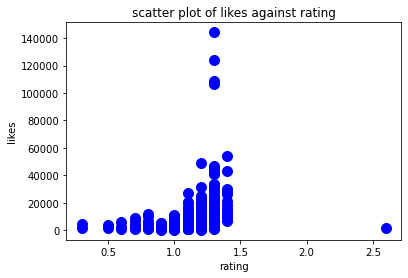

In [455]:
plt.pyplot.scatter(x=df_dogs_stage.rating, y=df_dogs_stage.favourites_count, c="blue", s=100)
plt.pyplot.xlabel('rating')
plt.pyplot.ylabel('likes')
plt.pyplot.title('scatter plot of likes against rating')

Likes increase as ratings increase

For the the insights and visualization made the twitter_archive_clean data cleaned from the twitter_archive data is being used. 

- The first insight is extrapolated using the pandas dataframe describe function comparing the each variables metrics.

- The second insight was made by creating a new dataframe of non "None" values for dog_stages. Which was then used to extrapolate the insight using the groupby function.

- The third insight was made using the new dataframe as well and the groupby function.

- The visualization was made using the dogs_stage dataframe, a scatter plot is used to visually represent the relationship between the dog ratings and their likes